In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('source_destination.csv')
df

,source_id,destination_id,source_name,destination_name,trip_status_id
0,4,48,Chennai,Vijayawada,7
1,369,48,Tirupati,Vijayawada,7
2,1144,4,Taloja,Chennai,7
3,254,8,Bhiwandi,Ghaziabad,7
4,253,32,Bangalore,Raipur,7
...,...,...,...,...,...
502423,4,264,Chennai,Coimbatore,6
502424,264,4,Coimbatore,Chennai,1
502425,11356,253,Avadi,Bangalore,1
502426,4,264,Chennai,Coimbatore,1


In [39]:
df = df[df['trip_status_id'] != 7 ]
df

,source_id,destination_id,source_name,destination_name,trip_status_id
37,98,20,Nelamangala,Hyderabad,15
59,4,20,Chennai,Hyderabad,15
66,20,32,Hyderabad,Raipur,15
70,172,1064,Avinashi,SriCity,15
71,145,312,Jabalpur,Nagpur,15
...,...,...,...,...,...
502423,4,264,Chennai,Coimbatore,6
502424,264,4,Coimbatore,Chennai,1
502425,11356,253,Avadi,Bangalore,1
502426,4,264,Chennai,Coimbatore,1


In [40]:
df1 = df.groupby(by = 'source_id')['source_name'].value_counts()
df1


source_id  source_name 
2          Kolkata         5661
3          Mumbai            26
4          Chennai         8895
5          Faridabad        220
6          Gurgaon          412
                           ... 
1935723    Bollaram           1
2185415    Panchagharia       1
2212445    Chatabar           2
2373715    Khori Kalan        1
2693338    Avadi             70
Name: count, Length: 1005, dtype: int64

In [41]:
top_10_with_rank = df1.reset_index(name='count')
# top_10_with_rank = top_10_with_rank.nlargest(10,columns = ['count'])
top_10_with_rank['rank_value'] = top_10_with_rank['count'].rank(method = 'max', ascending = False)
top_10_with_rank.sort_values(by =['rank_value']).head(10)
# top_10_with_rank.sort_values(by =['rank_value'],ascending = [False])


,source_id,source_name,count,rank_value
2,4,Chennai,8895,1.0
0,2,Kolkata,5661,2.0
14,20,Hyderabad,5500,3.0
94,264,Coimbatore,4113,4.0
89,254,Bhiwandi,3317,5.0
88,253,Bangalore,2697,6.0
38,98,Nelamangala,2022,7.0
262,1053,Viralimalai,1383,8.0
266,1064,SriCity,1048,9.0
294,1149,Bidadi,1021,10.0


In [58]:
top_10_with_rank = df1.reset_index('source_id')
# top_10_with_rank.plot(kind = 'line', subplots = True)

# top_10_with_rank = top_10_with_rank.nlargest(10,columns = ['count']).plot(kind='bar')
# plt.xlabel('source')
# plt.ylabel('Count')
# plt.title('Top sources')
# plt.show()

top_10_with_rank

,source_id,count
source_name,,
Kolkata,2,5661
Mumbai,3,26
Chennai,4,8895
Faridabad,5,220
Gurgaon,6,412
...,...,...
Bollaram,1935723,1
Panchagharia,2185415,1
Chatabar,2212445,2


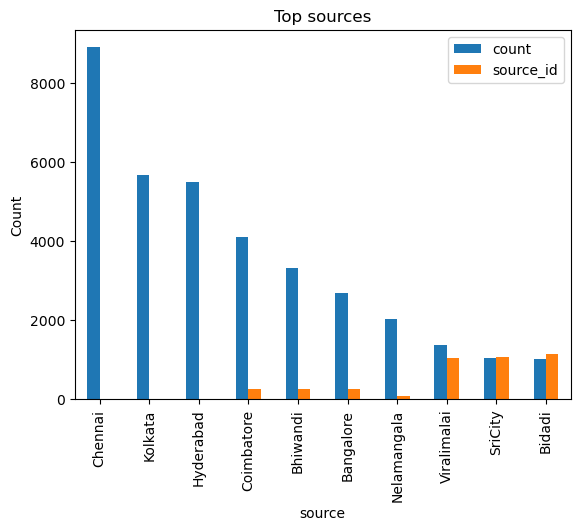

In [59]:
# top_10_with_rank.plot(kind = 'line', subplots = True)
top_10_with_rank = top_10_with_rank.nlargest(10,'count')
top_10_with_rank = top_10_with_rank[['count','source_id']].plot(kind='bar')
plt.xlabel('source')
plt.ylabel('Count')
plt.title('Top sources')
plt.show()
